# Machine Learning Mid-term Exam

## Phần 1: (20 điểm)

Câu hỏi 1. Trong Random Forest, các cây được huấn luyện như thế nào?

1. Mỗi cây được huấn luyện trên toàn bộ dữ liệu với tất cả các đặc trưng.
2. Mỗi cây được huấn luyện trên một tập con ngẫu nhiên của dữ liệu và đặc trưng.
3. Mỗi cây được huấn luyện trên một tập con của dữ liệu nhưng sử dụng tất cả các đặc trưng.
4. Mỗi cây được huấn luyện trên các nhãn được hoán vị ngẫu nhiên để đảm bảo sự đa dạng.

In [21]:
answer = 2
# YOUR CODE HERE
# raise NotImplementedError()

In [22]:
print("hoduytruong")

hoduytruong


## Phần 2: (60 điểm)
Hiện thực code theo yêu cầu.



### Giới Thiệu Bài Toán

Bộ dữ liệu này chứa thông tin về các yếu tố nhân khẩu học, dữ liệu tín dụng, lịch sử thanh toán và bảng sao kê hóa đơn của các khách hàng sử dụng thẻ tín dụng ở Đài Loan từ tháng 4 năm 2005 đến tháng 9 năm 2005.

Cột **target** (label): Thông tin vỡ nợ của khách hàng trong tháng tiếp theo (1 = có vỡ nợ, 0 = không vỡ nợ)

#### a) Mục tiêu:
Dự báo xác suất vỡ nợ của khách hàng (KH) hay dự báo liệu KH có mất khả năng thanh toán trong kỳ hạn sắp tới (tháng tới) hay không.

#### b) Danh sách các thuộc tính:
Bộ dữ liệu có tổng cộng 25 thuộc tính:

| Tên thuộc tính   | Mô tả                                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------------|
| **id**           | ID của mỗi khách hàng                                                                                        |
| **limit_balance** | Hạn mức tín dụng (NT dollar), bao gồm tín dụng cá nhân và gia đình/phụ trợ                                    |
| **sex**           | Giới tính (1 = nam, 2 = nữ)                                                                                 |
| **education**     | Trình độ học vấn (1 = tốt nghiệp sau đại học, 2 = đại học, 3 = trung học, 4 = khác, 5 = không rõ, 6 = không rõ) |
| **marriage**      | Tình trạng hôn nhân (1 = đã kết hôn, 2 = độc thân, 3 = khác)                                                |
| **age**           | Tuổi của khách hàng                                                                                         |
| **pay_status_1**  | Tình trạng thanh toán tháng 9/2005 (0 <= thanh toán hợp lệ, 1 = chậm 1 tháng, 2 = chậm 2 tháng, ..., 9 = chậm trên 9 tháng) |
| **pay_status_2**  | Tình trạng thanh toán tháng 8/2005 (tương tự như trên)                                                     |
| **pay_status_3**  | Tình trạng thanh toán tháng 7/2005 (tương tự như trên)                                                     |
| **pay_status_4**  | Tình trạng thanh toán tháng 6/2005 (tương tự như trên)                                                     |
| **pay_status_5**  | Tình trạng thanh toán tháng 5/2005 (tương tự như trên)                                                     |
| **pay_status_6**  | Tình trạng thanh toán tháng 4/2005 (tương tự như trên)                                                     |
| **bill_amount_1** | Số tiền hóa đơn tháng 9/2005 (NT dollar)                                                                   |
| **bill_amount_2** | Số tiền hóa đơn tháng 8/2005 (NT dollar)                                                                   |
| **bill_amount_3** | Số tiền hóa đơn tháng 7/2005 (NT dollar)                                                                   |
| **bill_amount_4** | Số tiền hóa đơn tháng 6/2005 (NT dollar)                                                                   |
| **bill_amount_5** | Số tiền hóa đơn tháng 5/2005 (NT dollar)                                                                   |
| **bill_amount_6** | Số tiền hóa đơn tháng 4/2005 (NT dollar)                                                                   |
| **pay_amount_1**  | Số tiền thanh toán vào tháng 9/2005 (NT dollar)                                                            |
| **pay_amount_2**  | Số tiền thanh toán vào tháng 8/2005 (NT dollar)                                                            |
| **pay_amount_3**  | Số tiền thanh toán vào tháng 7/2005 (NT dollar)                                                            |
| **pay_amount_4**  | Số tiền thanh toán vào tháng 6/2005 (NT dollar)                                                            |
| **pay_amount_5**  | Số tiền thanh toán vào tháng 5/2005 (NT dollar)                                                            |
| **pay_amount_6**  | Số tiền thanh toán vào tháng 4/2005 (NT dollar)                                                            |
| **target**        | Kết quả vỡ nợ trong tháng tiếp theo (1 = có vỡ nợ, 0 = không vỡ nợ)                                        |

#### c) Kết luận:
*Dựa trên phân loại này và dữ liệu được sử dụng, bài toán đặt ra là đánh giá điểm hành vi **(Behavior Score)** của khách hàng.*

In [23]:
# !pip install catboost
# !pip install toad
# !pip install seaborn
# !pip install scikit-learn
# !pip install imblearn
# !pip install Jinja2
# !pip install lightgbm
# !pip install xgboost

### 1. Đọc dữ liệu

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_curve, auc
# import toad
# from toad.metrics import KS, AUC
import time

import warnings
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

---

> [Bài tập]: Đọc dữ liệu ở đường dẫn `resources/data.csv` vào biến `df`. Sử dụng hàm `read_csv` của thư viên `pandas`

In [25]:
# df = pd.read_csv("./resources/data.csv")
# YOUR CODE HERE
# raise NotImplementedError()
df = pd.read_csv("./resources/data.csv")

df.head()

,id,limit_balance,sex,education,marriage,age,pay_status_1,pay_status_2,pay_status_3,pay_status_4,...,bill_amount_4,bill_amount_5,bill_amount_6,pay_amount_1,pay_amount_2,pay_amount_3,pay_amount_4,pay_amount_5,pay_amount_6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


---

### 2. Exploratory Data Analysis

#### 2.1 Cleaning data

##### Kiểm tra cột `sex`:
* Liệt kê các giá trị của cột 'sex':

In [26]:
vc = df["sex"].value_counts()
print(vc)

sex
2    18112
1    11888
Name: count, dtype: int64


##### Kiểm tra cột `education`:
* Liệt kê các giá trị của cột 'education':

> [Bài tập]: Tính số lần xuất hiện của các giá trị trong cột `education` của DataFrame `df`. Sử dụng hàm `value_counts` của thư viện `pandas` để lưu kết quả vào biến `vc`.

In [27]:
vc = None
# YOUR CODE HERE
# raise NotImplementedError()
vc = df["education"].value_counts()
print(vc)

education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


* Theo như mô tả của dữ liệu, cột `education` chỉ có các giá trị từ 1,2,3,4,5,6 nhưng lại xuất hiện cả giá trị 0 => Chúng ta sẽ gộp chung những giá trị 0,5,6 thành giá trị 4 (others)

In [28]:
fill = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[fill, "education"] = 4
print(df["education"].value_counts())

education
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


##### Kiểm tra cột `marriage`:
* Liệt kê các giá trị của cột `marriage`:

In [29]:
print(df["marriage"].value_counts())

marriage
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


* Theo như mô tả của dữ liệu, cột `marriage` chỉ có các giá trị từ 1 (married),2 (single),3 (others) nhưng lại xuất hiện cả giá trị 0 => Chúng ta sẽ gộp chung những giá trị 0, 3 thành giá trị 3 (others)

> [Bài tập]: Thay thế các giá trị `0` hoặc `3` trong cột `marriage` của DataFrame `df` bằng giá trị `3`. Sử dụng điều kiện lọc để cập nhật cột `marriage`.


In [30]:
# fill =
# df.loc
# YOUR CODE HERE
# raise NotImplementedError()

fill = (df.marriage == 0) | (df.marriage == 3)
df.loc[fill, "marriage"] = 3
print(df["marriage"].value_counts())

marriage
2    15964
1    13659
3      377
Name: count, dtype: int64


##### Kiểm tra cột các cột `pay_status_`:
* Liệt kê các giá trị của các cột `pay_status_*`:

> [Bài tập]: Tính số lần xuất hiện của các giá trị trong cột các cột bắt đầu bằng `pay_status_`. Lưu kết quả vào biến `vcs` để hiển thị kết quả gộp bằng `pd.concat`.

In [31]:
vcs = []
for col in df.columns:

    if "pay_status_" in col:
        vcs.append(df[col].value_counts().rename(col))

pd.concat(vcs, axis=1).sort_index()

,pay_status_1,pay_status_2,pay_status_3,pay_status_4,pay_status_5,pay_status_6
-2,2759,3782,4085,4348,4546.0,4895.0
-1,5686,6050,5938,5687,5539.0,5740.0
0,14737,15730,15764,16455,16947.0,16286.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0


* Theo mô tả của bộ dữ liệu giá trị của `pay_status_*` nếu có giá trị 0 <= thanh toán hợp lệ, 1 = thanh toán chậm 1 tháng, 2 = thanh toán chậm 2 tháng, ... 8 = thanh toán chậm 8 tháng, 9 = thanh toán chậm 9 tháng hoặc nhiều hơn. Vậy những giá trị 0, -1, -2 cũng là những thanh toán hợp lệ nên chúng ta sẽ gom lại thành 0 để thể hiện duy nhất một loại thanh toán hợp lệ của KH

>  Thay thế các giá trị `-1` hoặc `-2` trong các cột bắt đầu bằng `pay_status_` của DataFrame `df` bằng giá trị `0`. Sau đó, tính số lần xuất hiện của các giá trị trong các cột này và lưu vào biến `vcs` để hiển thị kết quả gộp bằng `pd.concat`.

In [32]:
vcs = []
for col in df.columns:

    if "pay_status_" in col:
        fill = (df[col] == 0) | (df[col] == -1) | (df[col] == -2)
        df.loc[fill, col] = 0
        vcs.append(df[col].value_counts().rename(col))


pd.concat(vcs, axis=1).sort_index()

,pay_status_1,pay_status_2,pay_status_3,pay_status_4,pay_status_5,pay_status_6
0,23182,25562,25787,26490,27032.0,26921.0
1,3688,28,4,2,NaN,NaN
2,2667,3927,3819,3159,2626.0,2766.0
3,322,326,240,180,178.0,184.0
4,76,99,76,69,84.0,49.0
5,26,25,21,35,17.0,13.0
6,11,12,23,5,4.0,19.0
7,9,20,27,58,58.0,46.0
8,19,1,3,2,1.0,2.0


##### Kiểm tra cột các cột dạng float64:
* Kiểm tra các thông số thông kê của các cột dạng float64:

In [33]:
cols = df.loc[:, df.dtypes == np.float64].columns

df[cols].describe()

,limit_balance,bill_amount_1,bill_amount_2,bill_amount_3,bill_amount_4,bill_amount_5,bill_amount_6,pay_amount_1,pay_amount_2,pay_amount_3,pay_amount_4,pay_amount_5,pay_amount_6
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


##### Liệt kê các cột không sử dụng

In [34]:
unused_cols = ["id", "target"]

##### Chuyển các cột categorical thành dạng object

In [35]:
categorical_cols = [
    "sex",
    "education",
    "marriage",
    "pay_status_1",
    "pay_status_2",
    "pay_status_3",
    "pay_status_4",
    "pay_status_5",
    "pay_status_6",
]
df[categorical_cols] = df[categorical_cols].astype("object")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30000 non-null  int64  
 1   limit_balance  30000 non-null  float64
 2   sex            30000 non-null  object 
 3   education      30000 non-null  object 
 4   marriage       30000 non-null  object 
 5   age            30000 non-null  int64  
 6   pay_status_1   30000 non-null  object 
 7   pay_status_2   30000 non-null  object 
 8   pay_status_3   30000 non-null  object 
 9   pay_status_4   30000 non-null  object 
 10  pay_status_5   30000 non-null  object 
 11  pay_status_6   30000 non-null  object 
 12  bill_amount_1  30000 non-null  float64
 13  bill_amount_2  30000 non-null  float64
 14  bill_amount_3  30000 non-null  float64
 15  bill_amount_4  30000 non-null  float64
 16  bill_amount_5  30000 non-null  float64
 17  bill_amount_6  30000 non-null  float64
 18  pay_am

#### 2.2 Features

In [36]:
# Biểu đồ histogram
def plot_hist_subplot(x, fieldname, bins=10, use_kde=True):
    x = x.dropna()
    xlabel = "{} bins tickers".format(fieldname)
    ylabel = "Count obs in {} each bin".format(fieldname)
    title = "histogram plot of {} with {} bins".format(fieldname, bins)
    ax = sns.distplot(x, bins=bins, kde=use_kde)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

In [37]:
# Biểu đồ barchart
def plot_barchart_subplot(x, fieldname):
    xlabel = "Group of {}".format(fieldname)
    ylabel = "Count obs in {} each bin".format(fieldname)
    title = "Barchart plot of {}".format(fieldname)
    x = x.fillna("Missing")
    df_summary = x.value_counts(dropna=False)
    y_values = df_summary.values
    x_index = df_summary.index
    ax = sns.barplot(x=x_index, y=y_values, order=x_index)
    labels = list(set(x))
    for label, p in zip(y_values, ax.patches):
        ax.annotate(label, (p.get_x() + 0.25, p.get_height() + 0.15))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return ax

In [38]:
# Vẽ biểu đồ cho tất cả feature
def plot_all_features(df, unused_cols=None):
    if unused_cols is not None:
        df_plot = df.drop(unused_cols, axis=1)
    fig = plt.figure(figsize=(20, 30))
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
    for i, (fieldname, dtype) in enumerate(zip(df_plot.columns, df_plot.dtypes.values)):
        ax_i = fig.add_subplot(8, 3, i + 1)
        if dtype in ["float64", "int64"]:
            ax_i = plot_hist_subplot(df_plot[fieldname], fieldname=fieldname)
        else:
            ax_i = plot_barchart_subplot(df_plot[fieldname], fieldname=fieldname)

    fig.suptitle("Visualization all fields")
    plt.show()

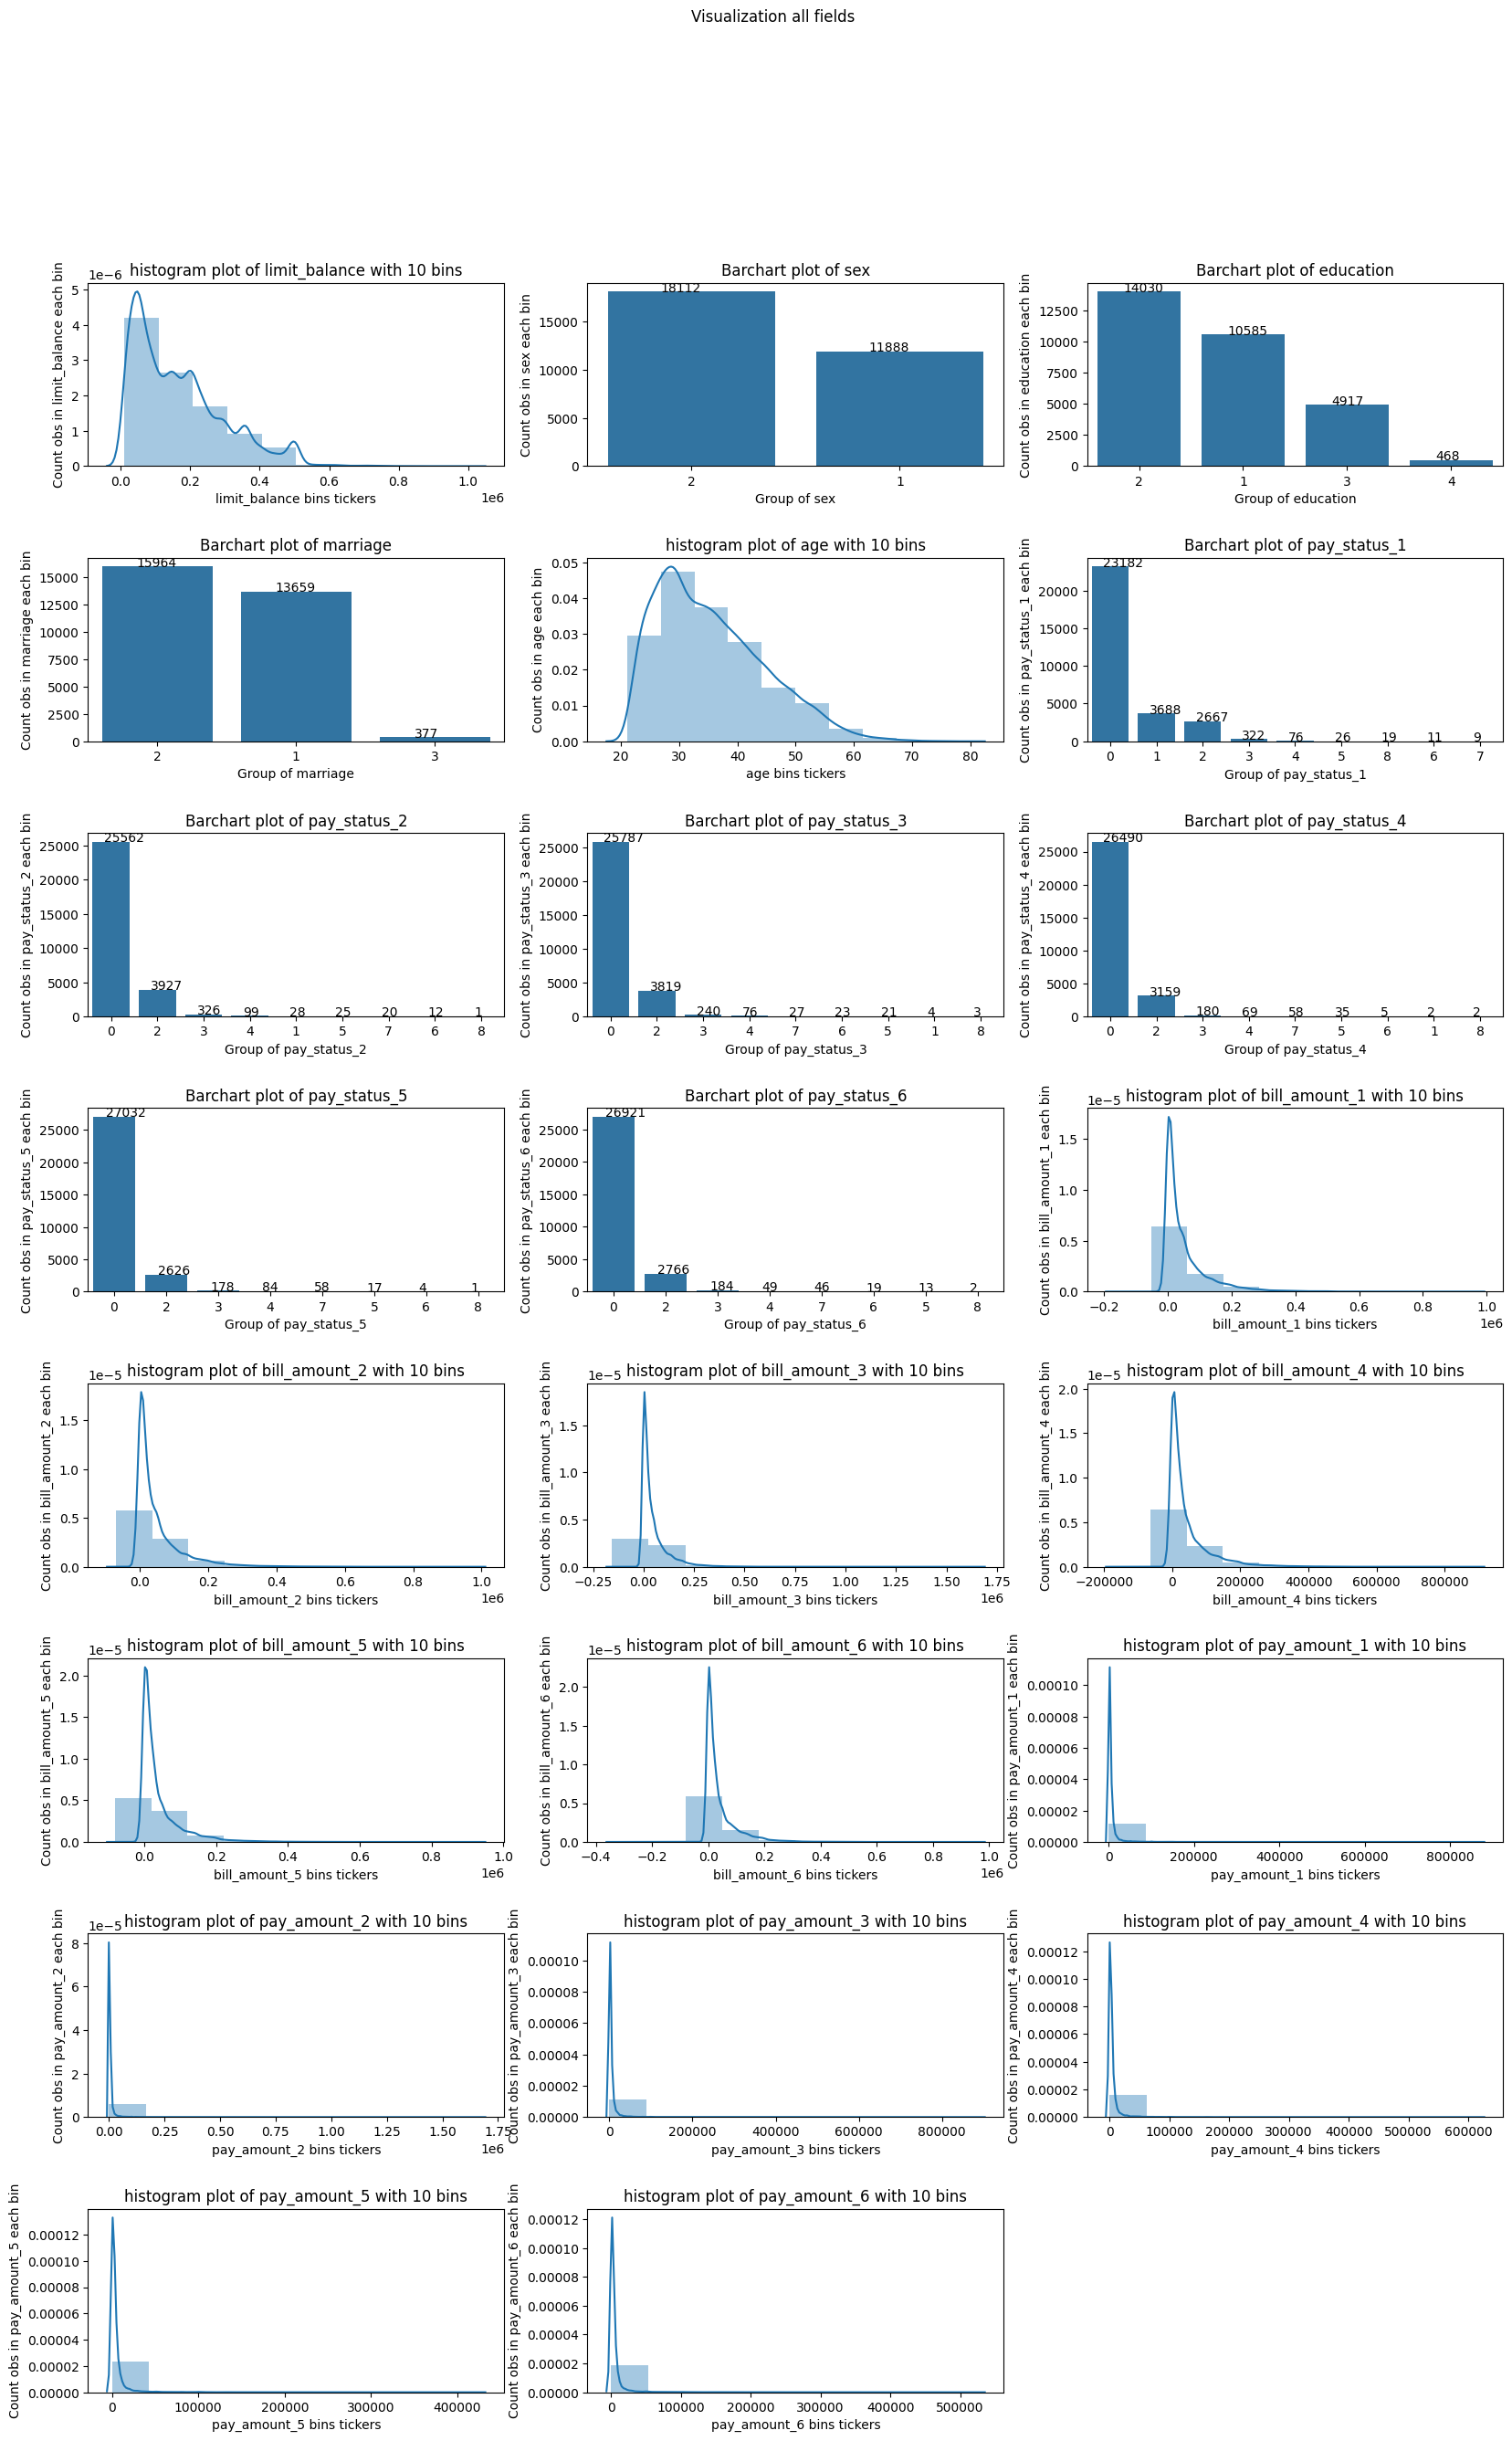

In [39]:
plot_all_features(df, unused_cols=unused_cols)

##### Tiến hành gộp các giá trị categorical có số quan sát dưới 5% thành nhóm 'other'

> [Bài tập]: Đối với mỗi cột trong danh sách `categorical_cols`, tính tỷ lệ phần trăm của từng giá trị trong cột. Những giá trị chiếm dưới 5% sẽ được thay thế bằng `'other'`. Sau đó, hiển thị biểu đồ cho tất cả các đặc trưng với hàm `plot_all_features`.

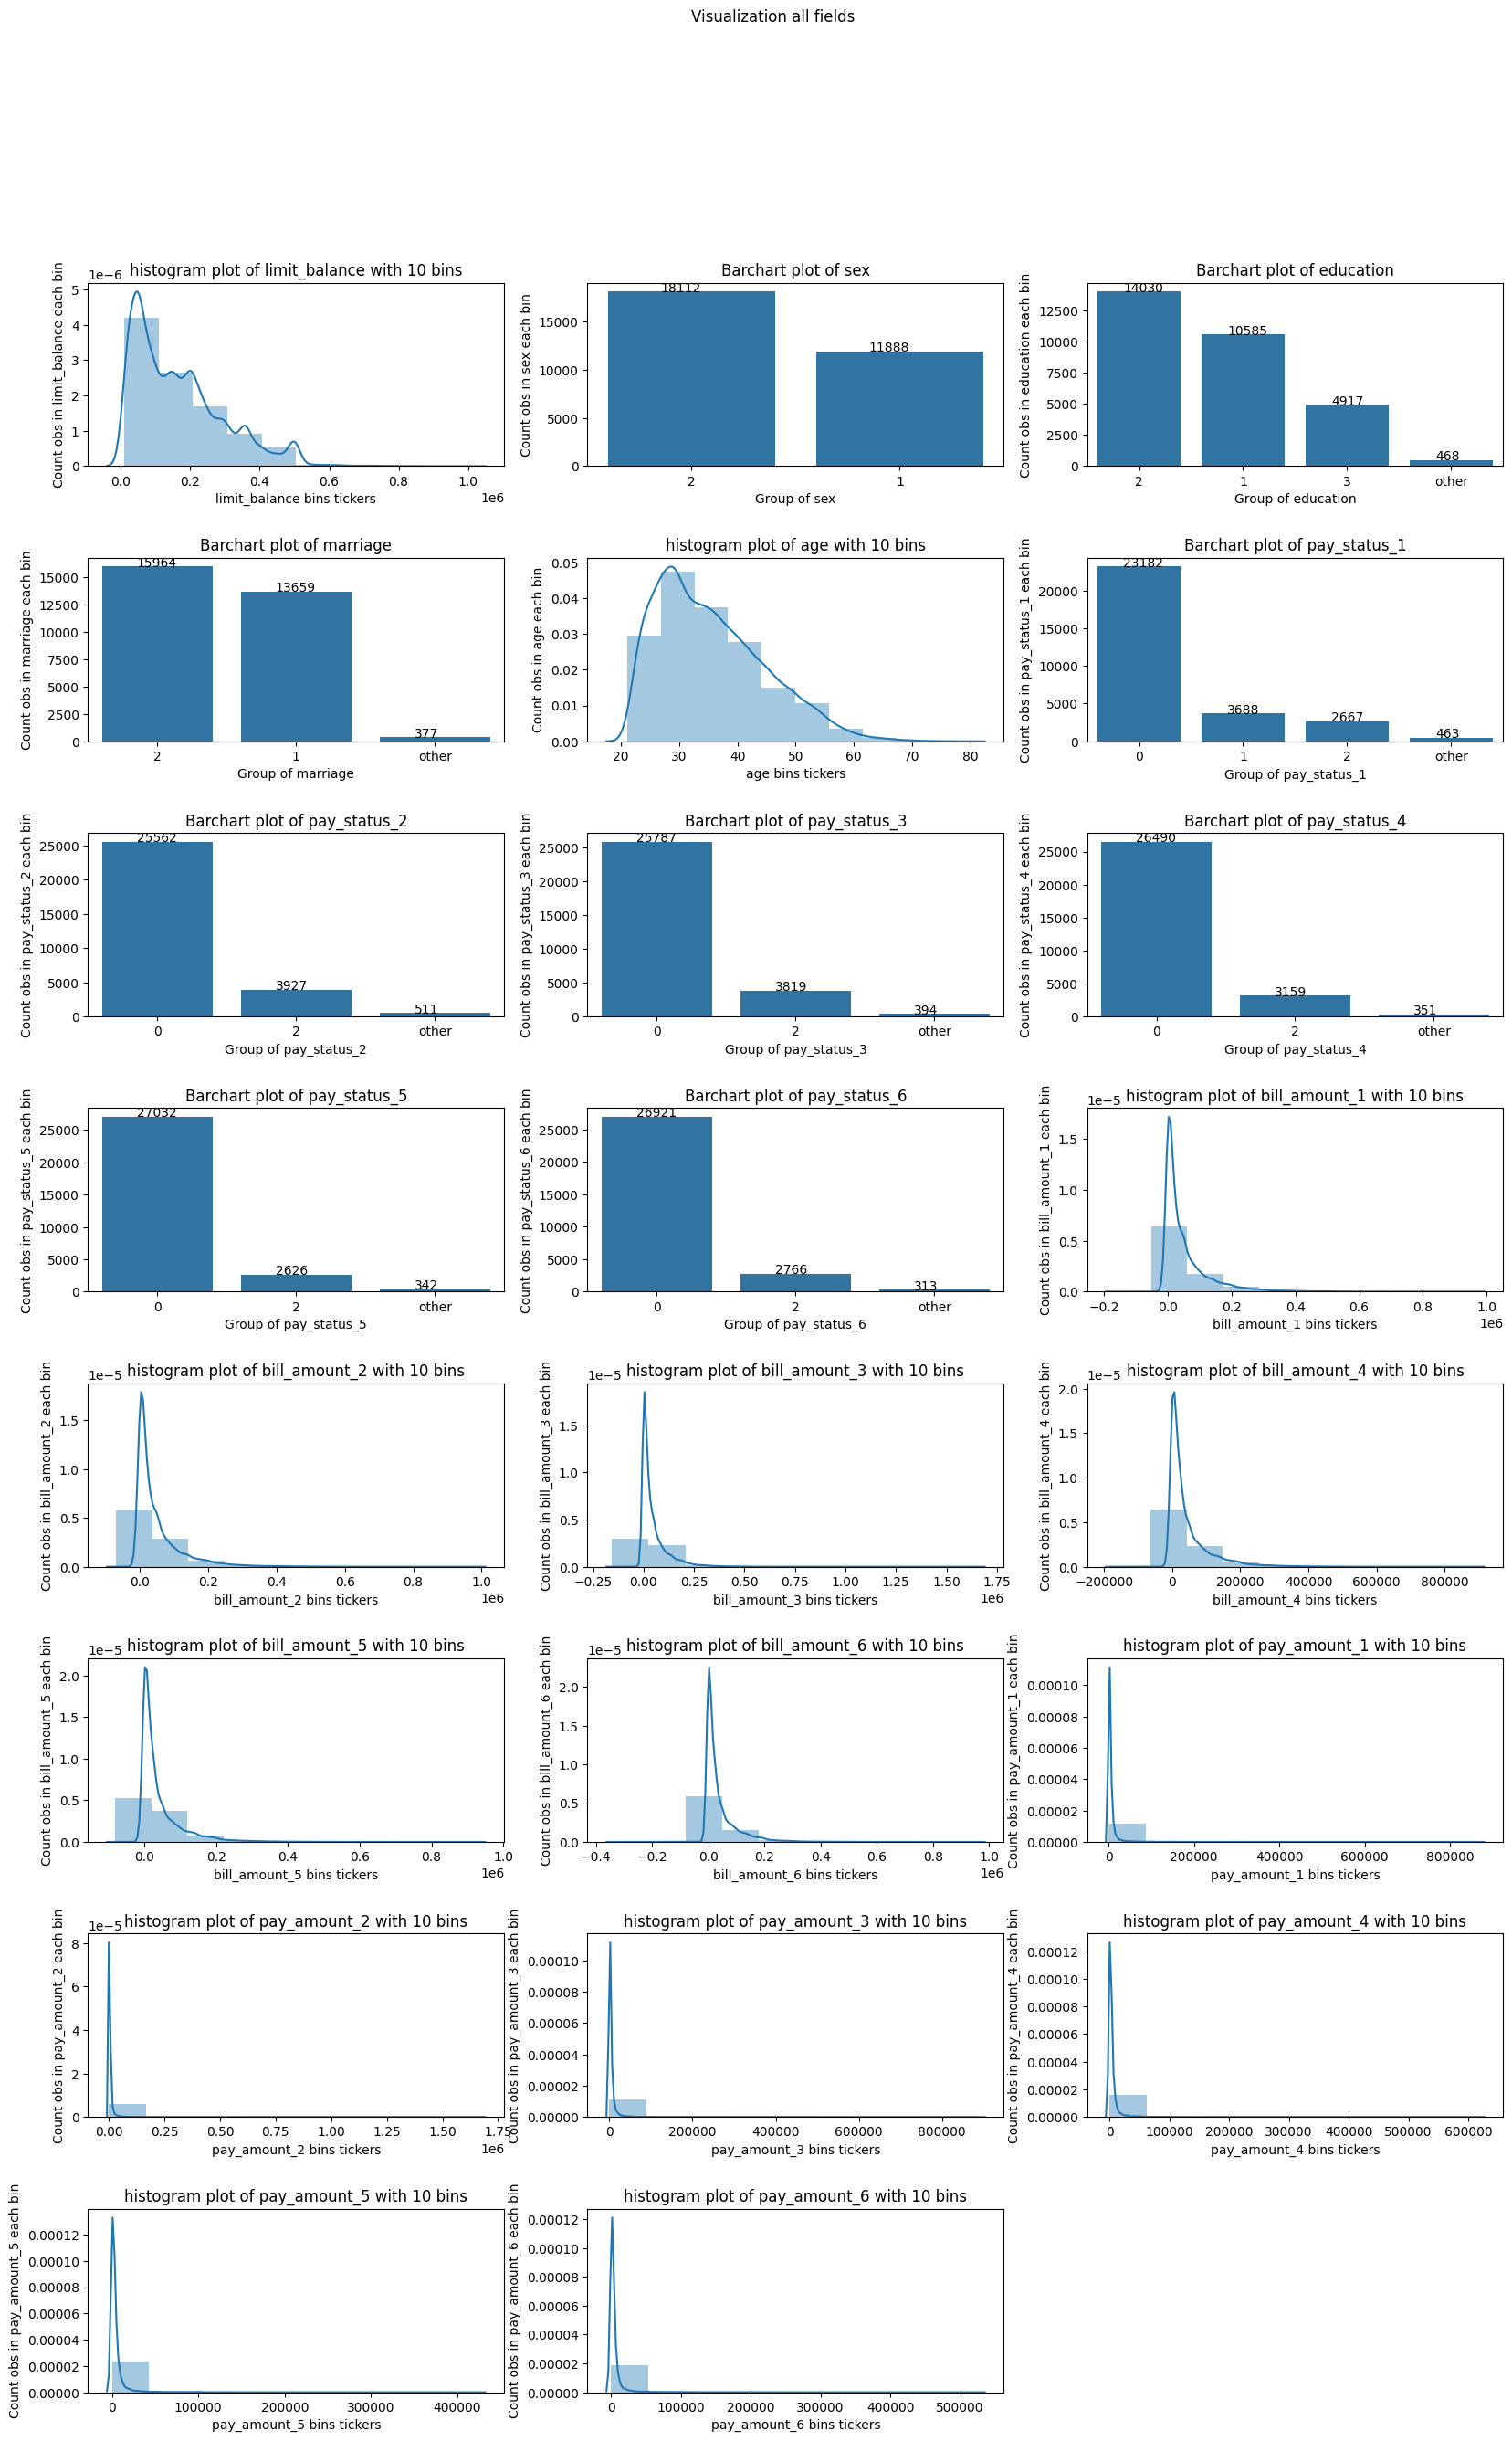

In [40]:
for col in categorical_cols:

    vc = df[col].value_counts()
    mask = (vc / vc.sum() * 100).lt(5)
    df[col] = np.where(df[col].isin(vc[mask].index), "other", df[col])


plot_all_features(df, unused_cols=unused_cols)

#### 2.3 Target

##### Kiểm tra cột `target`:
* Liệt kê các giá trị của cột 'target':

In [41]:
print(df["target"].value_counts() / len(df))

target
0    0.7788
1    0.2212
Name: count, dtype: float64


* Vẽ biểu đồ Histogram cho cột target:

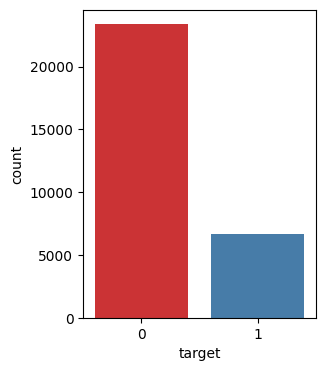

In [42]:
f, ax = plt.subplots(figsize=(3, 4))
ax = sns.countplot(x="target", data=df, palette="Set1")
plt.show()

---

### 3. Feature Engineering

#### 3.1 Spliting the Data

> [Bài tập]: Viết hàm `data_split(df, start, end, col)` để tách dữ liệu từ DataFrame `df` theo giá trị trong cột `col`. Chỉ giữ lại các hàng có giá trị trong cột `col` nằm trong khoảng từ `start` (bao gồm) đến `end` (không bao gồm). Sau đó, reset lại chỉ mục của DataFrame kết quả. Luôn đảm bao 0<=`start`<=`end`<=`len(df)`

In [59]:
def data_split(df, start, end, col):
    # YOUR CODE HERE
    # raise NotImplementedError()
    data = df[(df[col] >= start) & (df[col] < end)].reset_index(drop=True)

    return data

In [44]:
df_train = data_split(df, start=0, end=22500, col="id")
df_test = data_split(df, start=22500, end=30001, col="id")

print("df_train shape: ", df_train.shape)
print("df_test shape: ", df_test.shape)

df_train shape:  (22499, 25)
df_test shape:  (7501, 25)


#### 3.2 Feature Binning

In [60]:
def feature_binning(data, colname, n_bins=10, thres_tunning=None):
    X = data[[colname, "target"]]
    coltype = X[colname].dtype

    # if coltype in ["float", "int"]:
    # if coltype in ["float", "int", "int64"]:
    if np.issubdtype(X[colname].dtype, np.number):
        X = X.sort_values(colname)

        if thres_tunning is None:
            bins, thres = pd.qcut(X[colname], q=n_bins, retbins=True)
            thres[0] = -float("inf")
            thres[-1] = float("inf")
            bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
            X["bins"] = bins
        else:
            bins, thres = pd.cut(X[colname], bins=thres_tunning, retbins=True)
            X["bins"] = bins

    elif coltype == "object":
        X["bins"] = X[colname]

    df_GB = pd.pivot_table(
        X,
        index=["bins"],
        values=["target"],
        columns=["target"],
        aggfunc={"target": np.size},
    )

    df_Count = pd.pivot_table(
        X, index=["bins"], values=["target"], aggfunc={"target": np.size}
    )

    # if coltype in ["float", "int"]:
    if np.issubdtype(coltype, np.number):
        df_Thres = pd.DataFrame({"Thres": thres[1:]}, index=df_GB.index)
    elif coltype == "object":
        df_Thres = pd.DataFrame(index=df_GB.index)
        thres = None
    df_Count.columns = ["No_Obs"]
    df_Count["%Obs"] = df_Count["No_Obs"] / len(X)
    df_GB.columns = ["#Non_Default", "#Default"]
    df_summary = df_Thres.join(df_Count).join(df_GB)
    return df_summary, thres

>  Bổ sung hàm `_WOE` để tính toán các giá trị **Weight of Evidence (WOE)** và **Information Value (IV)** cho một cột trong DataFrame. Từ dữ liệu đã được chia thành các nhóm nhờ hàm `feature_binning` hãy bổ sung các cột sau cho bảng `df_summary`:
>  - `Default/Non_Default`: Tỷ lệ giữa số lượng phần tử có nhãn là 1 và nhãn là 0 trong nhóm đang xét.
>  - `%Default`: Tỷ lệ phần trăm của phần tử có nhãn là 1 trên tổng số phần tử trong nhóm đang xét.
>  - `%Non_Default`: Tỷ lệ phần trăm của phần tử có nhãn là 0 trên tổng số phần tử trong nhóm đang xét.
>  - `WOE`: Weight of Evidence của nhóm đang xét.
>  - `IV`: Giá trị Information Value của nhóm đang xét.


Information Value of limit_balance column: 0.16407862853528818
Information Value of sex column: 0.008270368975393537
Information Value of education column: 0.03638077634388631
Information Value of marriage column: 0.007136970884237461
Information Value of age column: 0.02222094500160811
Information Value of pay_status_1 column: 0.8431800807824921
Information Value of pay_status_2 column: 0.5251806074311437
Information Value of pay_status_3 column: 0.3952704800429854
Information Value of pay_status_4 column: 0.341826692881437
Information Value of pay_status_5 column: 0.3316592520090601
Information Value of pay_status_6 column: 0.27675890510809076
Information Value of bill_amount_1 column: 0.01222242195444229


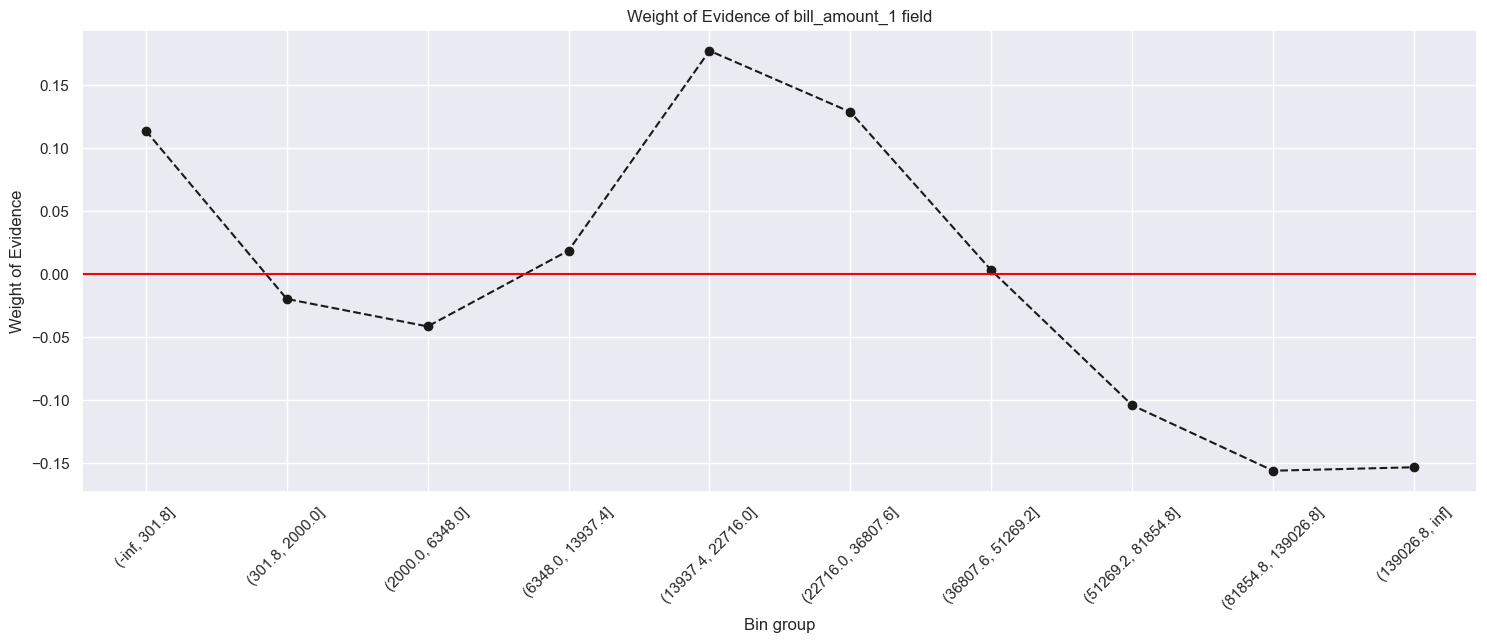

Information Value of bill_amount_2 column: 0.010108192428236882
Information Value of bill_amount_3 column: 0.010570279481861518
Information Value of bill_amount_4 column: 0.011485777236758692
Information Value of bill_amount_4 column: 0.011485777236758692
Information Value of bill_amount_5 column: 0.014951773840974172
Information Value of bill_amount_6 column: 0.014924151543331533
Information Value of pay_amount_1 column: 0.1362410726034311
Information Value of pay_amount_2 column: 0.12540650741405465
Information Value of pay_amount_3 column: 0.08951797347094159
Information Value of pay_amount_4 column: 0.09222915352657157
Information Value of pay_amount_5 column: 0.07407858537979423
Information Value of pay_amount_6 column: 0.08744206228285195


In [61]:
def _WOE(data, colname, n_bins=None, thres_tunning=None):
    df_summary, thres = feature_binning(
        data, colname, n_bins=n_bins, thres_tunning=thres_tunning
    )
    df_summary["#Default"] = df_summary["#Default"].replace({0: 1})

    df_summary["Default/Non_Default"] = (
        df_summary["#Default"] / df_summary["#Non_Default"]
    )
    df_summary["%Default"] = df_summary["#Default"] / df_summary["#Default"].sum()
    df_summary["%Non_Default"] = (
        df_summary["#Non_Default"] / df_summary["#Non_Default"].sum()
    )
    df_summary["WOE"] = np.log(df_summary["%Default"] / df_summary["%Non_Default"])
    df_summary["IV"] = (
        df_summary["%Default"] - df_summary["%Non_Default"]
    ) * df_summary["WOE"]

    df_summary["COLUMN"] = colname
    IV = df_summary["IV"].sum()
    print("Information Value of {} column: {}".format(colname, IV))
    return df_summary, IV, thres


def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    sns.set()
    colname = list(df_summary["COLUMN"].unique())[0]
    x = np.array([str(element) for element in df_WoE.index.tolist()])
    y = df_WoE["WOE"]
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker="o", linestyle="--", color="k")
    plt.xlabel("Bin group")
    plt.ylabel("Weight of Evidence")
    plt.title("Weight of Evidence of {} field".format(colname))
    plt.axhline(y=0, color="red")
    plt.xticks(rotation=rotation_of_x_axis_labels)
    plt.show()


WOE_dict = dict()
### Feature `limit_balance`:
df_summary, IV, thres = _WOE(df_train, "limit_balance", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["limit_balance"] = {"table": df_summary, "IV": IV}
### Feature `sex`:
df_summary, IV, thres = _WOE(df_train, "sex", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["sex"] = {"table": df_summary, "IV": IV}
### Feature `education`:
df_summary, IV, thres = _WOE(df_train, "education", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["education"] = {"table": df_summary, "IV": IV}
### Feature `marriage`:
df_summary, IV, thres = _WOE(df_train, "marriage", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["marriage"] = {"table": df_summary, "IV": IV}
### Feature `age`:
df_summary, IV, thres = _WOE(df_train, "age", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["age"] = {"table": df_summary, "IV": IV}
### Feature `pay_status_1`:
df_summary, IV, thres = _WOE(df_train, "pay_status_1", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_status_1"] = {"table": df_summary, "IV": IV}
### Feature `pay_status_2`:
df_summary, IV, thres = _WOE(df_train, "pay_status_2", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_status_2"] = {"table": df_summary, "IV": IV}
### Feature `pay_status_3`:
df_summary, IV, thres = _WOE(df_train, "pay_status_3", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_status_3"] = {"table": df_summary, "IV": IV}
### Feature `pay_status_4`:
df_summary, IV, thres = _WOE(df_train, "pay_status_4", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_status_4"] = {"table": df_summary, "IV": IV}
### Feature `pay_status_5`:
df_summary, IV, thres = _WOE(df_train, "pay_status_5", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_status_5"] = {"table": df_summary, "IV": IV}
### Feature `pay_status_6`:
df_summary, IV, thres = _WOE(df_train, "pay_status_6", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_status_6"] = {"table": df_summary, "IV": IV}
### Feature `bill_amount_1`:
df_summary, IV, thres = _WOE(df_train, "bill_amount_1", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])
plot_by_woe(df_summary, 45)
WOE_dict["bill_amount_1"] = {"table": df_summary, "IV": IV}
### Feature `bill_amount_2`:
df_summary, IV, thres = _WOE(df_train, "bill_amount_2", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["bill_amount_2"] = {"table": df_summary, "IV": IV}
### Feature `bill_amount_3`:
df_summary, IV, thres = _WOE(df_train, "bill_amount_3", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["bill_amount_3"] = {"table": df_summary, "IV": IV}
### Feature `bill_amount_4`:
df_summary, IV, thres = _WOE(df_train, "bill_amount_4", n_bins=10)
df_summary, IV, thres = _WOE(df_train, "bill_amount_4", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["bill_amount_4"] = {"table": df_summary, "IV": IV}
### Feature `bill_amount_5`:
df_summary, IV, thres = _WOE(df_train, "bill_amount_5", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["bill_amount_5"] = {"table": df_summary, "IV": IV}
### Feature `bill_amount_6`:
df_summary, IV, thres = _WOE(df_train, "bill_amount_6", n_bins=10)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["bill_amount_6"] = {"table": df_summary, "IV": IV}
### Feature `pay_amount_1`:
df_summary, IV, thres = _WOE(df_train, "pay_amount_1", n_bins=4)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_amount_1"] = {"table": df_summary, "IV": IV}
### Feature `pay_amount_2`:
df_summary, IV, thres = _WOE(df_train, "pay_amount_2", n_bins=4)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_amount_2"] = {"table": df_summary, "IV": IV}
### Feature `pay_amount_3`:
df_summary, IV, thres = _WOE(df_train, "pay_amount_3", n_bins=4)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_amount_3"] = {"table": df_summary, "IV": IV}
### Feature `pay_amount_4`:
df_summary, IV, thres = _WOE(df_train, "pay_amount_4", n_bins=4)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_amount_4"] = {"table": df_summary, "IV": IV}
### Feature `pay_amount_5`:
df_summary, IV, thres = _WOE(df_train, "pay_amount_5", n_bins=4)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_amount_5"] = {"table": df_summary, "IV": IV}
### Feature `pay_amount_6`:
df_summary, IV, thres = _WOE(df_train, "pay_amount_6", n_bins=4)
df_summary.style.bar(subset=["WOE", "%Default"])

WOE_dict["pay_amount_6"] = {"table": df_summary, "IV": IV}

#### 3.3 Information Value

In [62]:
columns = []
IVs = []
for col in df_train.columns:
    if col not in unused_cols:
        columns.append(col)
        IVs.append(WOE_dict[col]["IV"])
df_iv = pd.DataFrame({"feature": columns, "IV": IVs})

> [Bài tập]: Viết hàm `_rank_IV` để xếp hạng mức độ quan trọng của giá trị **Information Value (IV)**. Trả về một chuỗi tương ứng với mức độ quan trọng của `iv`:
> * `'Useless'`    nếu IV ≤ 0.02
> * `'Weak'`       nếu 0.02 ≤ IV ≤ 0.1
> * `'Medium'`     nếu 0.1 ≤ IV ≤ 0.3
> * `'Strong'`     nếu 0.3 ≤ IV ≤ 0.5
> * `'Suspicious'` nếu IV > 0.5

In [63]:
def _rank_IV(iv):

    if iv <= 0.02:
        return "Useless"
    elif iv <= 0.1:
        return "Weak"
    elif iv <= 0.3:
        return "Medium"
    elif iv <= 0.5:
        return "Strong"
    else:
        return "Suspicious"


df_iv["rank"] = df_iv["IV"].apply(lambda x: _rank_IV(x))
df_iv.sort_values("IV", ascending=False)

,feature,IV,rank
5,pay_status_1,0.843180,Suspicious
6,pay_status_2,0.525181,Suspicious
7,pay_status_3,0.395270,Strong
8,pay_status_4,0.341827,Strong
9,pay_status_5,0.331659,Strong
10,pay_status_6,0.276759,Medium
0,limit_balance,0.164079,Medium
17,pay_amount_1,0.136241,Medium
18,pay_amount_2,0.125407,Medium
20,pay_amount_4,0.092229,Weak


**Nhận xét:**
* Trong thực tế, các biến có IV nhỏ hơn 0.02 sẽ bị loại. Từ đó, 8 biến `sex`, `marriage`, `bill_amount_(1,2,3,4,5,6)` sẽ bị loại.
* Có thể thấy `pay_amount_1`có IV cao nhất. Điều này hợp lí vì biến thể hiện tình trạng thanh toán ở thời điểm gần với thời điểm cần dự đoán nhất.

In [64]:
df_train_woe = df_train.drop(
    [
        "sex",
        "marriage",
        "bill_amount_1",
        "bill_amount_2",
        "bill_amount_3",
        "bill_amount_4",
        "bill_amount_5",
        "bill_amount_6",
    ],
    axis=1,
)
df_test_woe = df_test.drop(
    [
        "sex",
        "marriage",
        "bill_amount_1",
        "bill_amount_2",
        "bill_amount_3",
        "bill_amount_4",
        "bill_amount_5",
        "bill_amount_6",
    ],
    axis=1,
)

#### 3.4 Feature Encoding

In [65]:
for col in WOE_dict.keys():
    try:

        key = list(WOE_dict[col]["table"]["WOE"].index)
        woe = list(WOE_dict[col]["table"]["WOE"])
        d = dict(zip(key, woe))
        df_train_woe[col] = df_train_woe[col].map(d)
        df_test_woe[col] = df_test_woe[col].map(d)

    except:
        print(col)

sex
marriage
bill_amount_1
bill_amount_2
bill_amount_3
bill_amount_4
bill_amount_5
bill_amount_6


---

### 4. ML Models

#### 4.0 Helper function

In [66]:
unused_cols = ["id", "target"]
features_list = [feat for feat in df_train_woe.columns if feat not in unused_cols]

In [67]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)
    plt.show()


def plot_confusion_matrix(label, predictions):
    cf_matrix = confusion_matrix(label, predictions)
    labels = ["True Neg", "False Pos", "False Neg", "True Pos"]
    categories = ["Non default", "Default"]
    make_confusion_matrix(
        cf_matrix,
        categories=categories,
        group_names=labels,
        cbar=False,
        sum_stats=False,
        count=True,
    )


def plot_roc_pre_recall_curve(labels, probs):
    from sklearn.metrics import precision_recall_curve

    # Get ROC curve FPR and TPR from true labels vs score values
    fpr, tpr, _ = roc_curve(labels, probs)

    # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
    roc_auc = auc(fpr, tpr)

    # Calculate precision and recall from true labels vs score values
    precision, recall, _ = precision_recall_curve(labels, probs)

    plt.figure(figsize=(8, 3))

    plt.subplot(1, 2, 1)
    lw = 2
    plt.plot(
        fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.4f)" % roc_auc
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color="orange", where="post")
    # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title("Precision Recall Curve")
    plt.grid(True)

    left = 0.125  # the left side of the subplots of the figure
    right = 0.9  # the right side of the subplots of the figure
    bottom = 0.1  # the bottom of the subplots of the figure
    top = 0.9  # the top of the subplots of the figure
    wspace = 0.5  # the amount of width reserved for blank space between subplots
    hspace = 0.2  # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
    plt.show()

In [68]:
def get_evaluation_score(model, test_df, label):

    predictions = model.predict(test_df)

    accuracy = accuracy_score(label, predictions)
    # roc_auc = AUC(model.predict_proba(test_df)[:, 1], label)

    # vunh
    roc_auc = roc_auc_score(label, model.predict_proba(test_df)[:, 1])

    precision = precision_score(label, predictions)
    recall = recall_score(label, predictions)
    f1 = f1_score(label, predictions)

    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Precision  = {}".format(precision))
    print("Recall  = {}".format(recall))
    print("F1 Score  = {}".format(f1))

    print(classification_report(label, predictions))

    plot_confusion_matrix(label, predictions)

In [69]:
def run_model(model, train_data, test_data):

    X_train = train_data[features_list]
    y_train = train_data["target"]

    X_test = test_data[features_list]
    y_test = test_data["target"]

    model.fit(X_train, y_train)

    get_evaluation_score(model=model, test_df=X_test, label=y_test)

#### 4.1 Tree-based models

In [70]:
df_train_tree = df_train.copy()
df_test_tree = df_test.copy()
for col in categorical_cols:
    print(col, df[col].nunique())
    l_enc = LabelEncoder()
    df_train_tree[col] = l_enc.fit_transform(df_train_tree[col].values.astype(str))
    df_test_tree[col] = l_enc.fit_transform(df_test_tree[col].values.astype(str))

sex 2
education 4
marriage 3
pay_status_1 4
pay_status_2 3
pay_status_3 3
pay_status_4 3
pay_status_5 3
pay_status_6 3


##### 4.2.1 Random Forest

> [Bài tập]: Tạo một mô hình **RandomForestClassifier** sử dụng thư viện `sklearn` với tham số `params`

Accuracy = 0.8218904146113851
ROC Area under Curve = 0.7728364002081767
Precision  = 0.5949820788530465
Recall  = 0.4289405684754522
F1 Score  = 0.4984984984984985
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5953
           1       0.59      0.43      0.50      1548

    accuracy                           0.82      7501
   macro avg       0.73      0.68      0.70      7501
weighted avg       0.81      0.82      0.81      7501



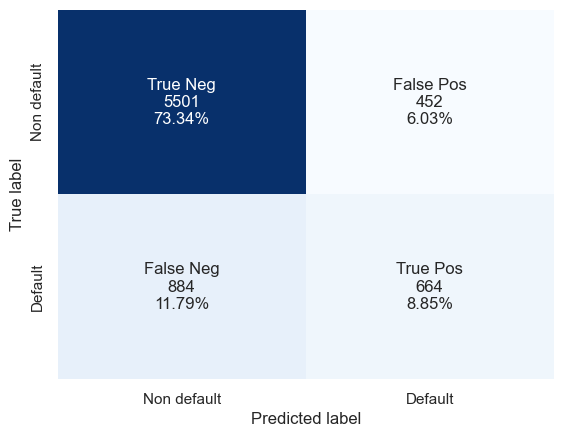

In [71]:
from sklearn.ensemble import RandomForestClassifier

params = {
    "max_depth": 16,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "n_estimators": 100,
    "random_state": 12345,
    "class_weight": "balanced",
}
# model =
# YOUR CODE HERE
# raise NotImplementedError()
model = RandomForestClassifier(**params)

run_model(model=model, train_data=df_train_tree, test_data=df_test_tree)

##### 4.2.2 XGB

> Tạo một mô hình **XGBClassifier** sử dụng thư viện `xgboost` với tham số `params`

Accuracy = 0.82842287694974
ROC Area under Curve = 0.7612229800968916
Precision  = 0.6613102595797281
Recall  = 0.3456072351421189
F1 Score  = 0.45396690708527787
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5953
           1       0.66      0.35      0.45      1548

    accuracy                           0.83      7501
   macro avg       0.75      0.65      0.68      7501
weighted avg       0.81      0.83      0.81      7501



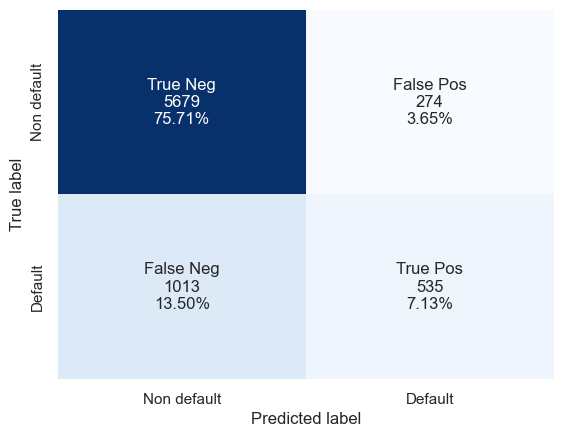

In [72]:
import xgboost

params = {
    "booster": "dart",
    "objective": "binary:logistic",
    "eta": 0.1,
    "silent": True,
    "max_depth": 8,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "eval_metric": "auc",
    "random_state": 42,
    "n_estimators": 200,
}
# model =
# YOUR CODE HERE
model = xgboost.XGBClassifier(**params)
# raise NotImplementedError()

run_model(model=model, train_data=df_train_tree, test_data=df_test_tree)

#### 4.2 Kết luận:

**Nhận xét:**
* Với bài toán Behavior Scoring, chúng ta nên chú trọng vào việc giảm số lượng sai lầm loại II (FN) mà mô hình phán đoán được. Những khách hàng thuộc sai lầm loại II về thực tế họ đã chưa thanh toán nhưng mô hình dự đoán những khách hàng này đã thanh toán theo đúng kỳ hạn. Xét theo góc độ tín dụng, nếu KH trả lãi không đủ và đúng hạn thì điểm tín dụng của KH sẽ thấp, nhảy nhóm nợ trên hệ thống tin tín dụng quốc gia CIC, điều này sẽ gây khó khăn cho các khoản vay tiếp theo của KH vì để có một CIC đẹp là người đã từng vay và trả lãi đúng hạn nên sai lầm loại II (FN) có tính chất nghiêm trọng hơn. Do đó,  ngoài việc lựa chọn mô hình tốt, chúng ta cũng cần lựa chọn những mô hình có các TH thuộc sai lầm loại II là thấp nhất.


---

## Phần 3: (20 điểm)

### Implement the function to compute `precision_score`

**Task**: Write a function `precision_score_from_scratch` that calculates the precision score for binary classification without using any external libraries. **You must not use `sklearn.metrics.precision_score` or any similar library function**. The function should take two arguments:

- `y_true`: a list of actual binary labels (0 or 1).
- `y_pred`: a list of predicted binary labels (0 or 1).

##### Formula for Precision: 

- Precision = True Positives (TP) / (True Positives (TP) + False Positives (FP))

The function should compute precision using the above formula.


In [58]:
def precision_score_from_scratch(y_true, y_pred):
    """
    Calculate precision score from scratch.

    Args:
    y_true (list): List of actual labels (0 or 1).
    y_pred (list): List of predicted labels (0 or 1).

    Returns:
    float: Precision score.
    """

    # Ensure lengths of y_true and y_pred match
    assert len(y_true) == len(y_pred), "Length of y_true and y_pred must match"
    precision = 0

    # tp =
    # fp =
    # if tp + fp == 0 : -------------
    # precision =
    # YOUR CODE HERE
    # raise NotImplementedError()
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1])
    fp = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1])

    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    return precision